In [ ]:
##Author: Sargon Morad
#Partner: Andrew Garvey
#Date: July 1st, 2019
#Client: Hospital for Sick Children

#Purpose:
#-   Visualize DI Data

In [12]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from IPython.display import display, HTML

In [13]:
di_clean = pd.read_csv(r'didata/clean_di.csv')

In [14]:
day_of_week_counts = pd.DataFrame(di_clean['OT Day of Week'].value_counts())
month_counts = pd.DataFrame(di_clean['OT Month'].value_counts())
hour_counts = pd.DataFrame(di_clean['OT Hour'].value_counts())

In [15]:
#Create a df for only CT, MRI, US, X-Ray
di_clean_2 = di_clean[di_clean['Category id'].isin(['2','7','9','10'])]

In [16]:
count_ym = pd.DataFrame(di_clean_2['OT Month Year'].value_counts())
count_ym = count_ym.rename(columns={'OT Month Year': 'Order Count'})
count_ym['OT Month Year'] = count_ym.index

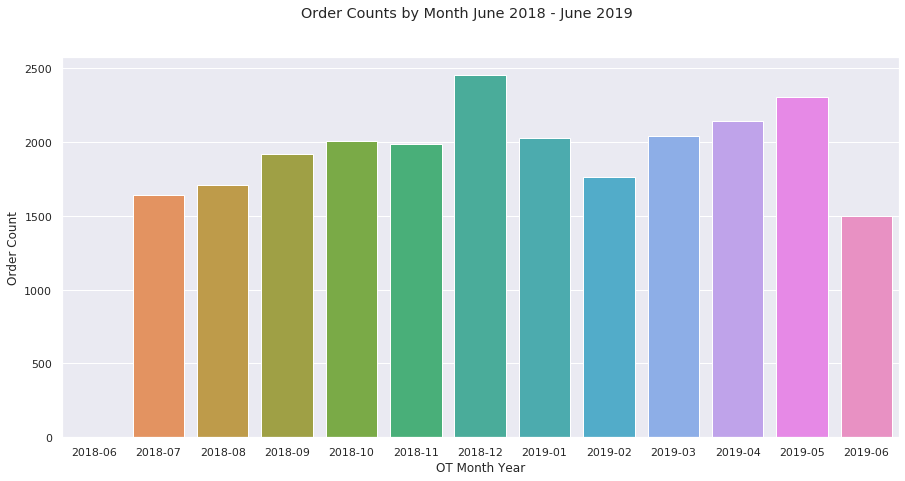

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle("Order Counts by Month June 2018 - June 2019")
sns.set()
p = sns.barplot(data=count_ym, x='OT Month Year', y='Order Count', order=['2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06'] )

In [22]:
di_clean_2.groupby(['Authorizing Provider id', 'Category'])['Category'].count()

Authorizing Provider id  Category               
0                        SK IMG X-RAY ORDERABLES     1
1                        SK IMG X-RAY ORDERABLES     1
2                        SK IMG X-RAY ORDERABLES     1
4                        SK IMG CT ORDERABLES        1
                         SK IMG X-RAY ORDERABLES     2
                                                    ..
243                      SK IMG MRI ORDERABLES       1
244                      SK IMG US ORDERABLES        2
                         SK IMG X-RAY ORDERABLES     4
245                      SK IMG MRI ORDERABLES       1
                         SK IMG X-RAY ORDERABLES    19
Name: Category, Length: 526, dtype: int64

[Text(0, 0, 'SK IMG US ORDERABLES'),
 Text(0, 0, 'SK IMG CT ORDERABLES'),
 Text(0, 0, 'SK IMG X-RAY ORDERABLES'),
 Text(0, 0, 'SK IMG MRI ORDERABLES')]

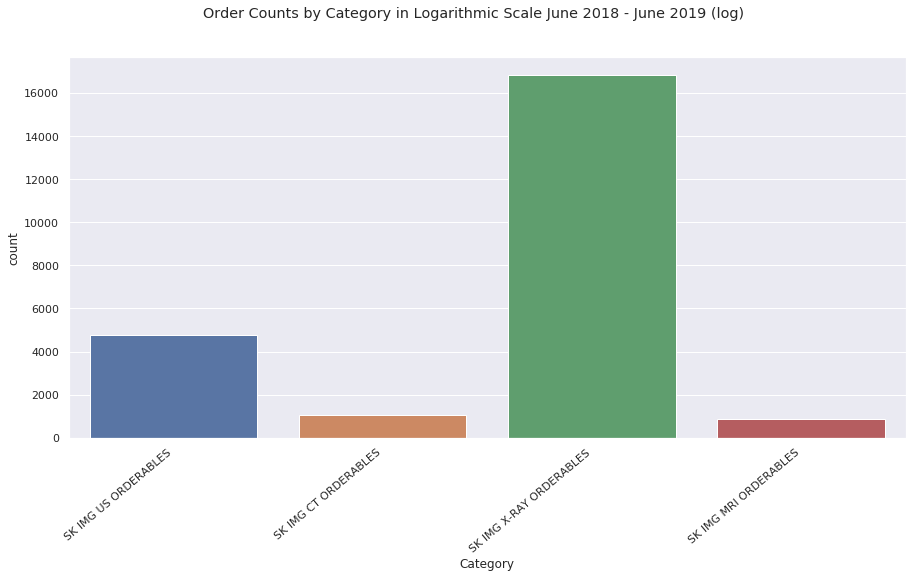

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle("Order Counts by Category in Logarithmic Scale June 2018 - June 2019 (log)")
p = sns.countplot(data=di_clean_2, x = 'Category')
p.set_xticklabels(p.get_xticklabels(), rotation = 40, ha = "right")
#p.set_yscale("log")

[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

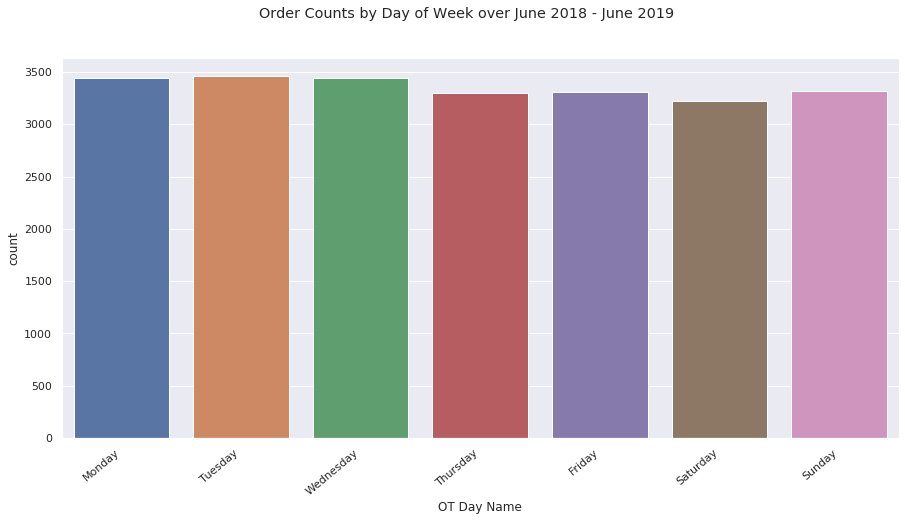

In [44]:
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle("Order Counts by Day of Week over June 2018 - June 2019")
p = sns.countplot(data=di_clean_2, x = 'OT Day Name', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
p.set_xticklabels(p.get_xticklabels(), rotation = 40, ha = "right")

#sns.set()
#di_data.hist('OT Day of Week', bins=7)
#plt.title('Order Counts by Day of Week')
#plt.xlabel('Day of Week')
#plt.ylabel('Order Count')

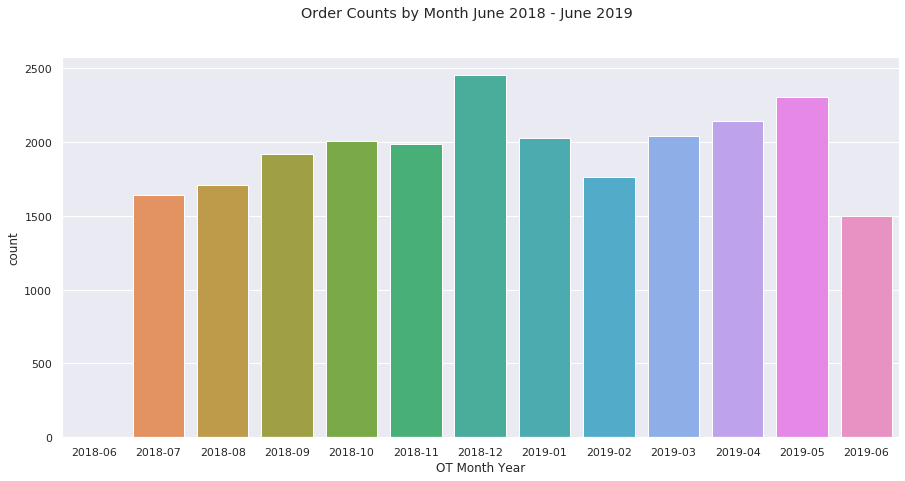

In [45]:
#p = sns.countplot(data=di_data, x = 'OT Month Name', order = di_data['OT Month Name'].value_counts().index)
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle("Order Counts by Month June 2018 - June 2019")
#p = sns.countplot(ax=ax, data=di_data, x = 'OT Month Name', order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
p = sns.countplot(ax=ax, data=di_clean_2, x = 'OT Month Year', order = ['2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06'])
#p = sns.countplot(ax=ax, data=di_data, x = 'OT Month Year')
#p.set_xticklabels(p.get_xticklabels(), rotation = 40, ha = "right")

#sns.countplot(x="OT Month Year", data=di_data, order=["2018-06", "2018-07", "2018-08", "2018-09", "2018-10", "2018-11", "2018-12", "2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06"] )
#plt.show()

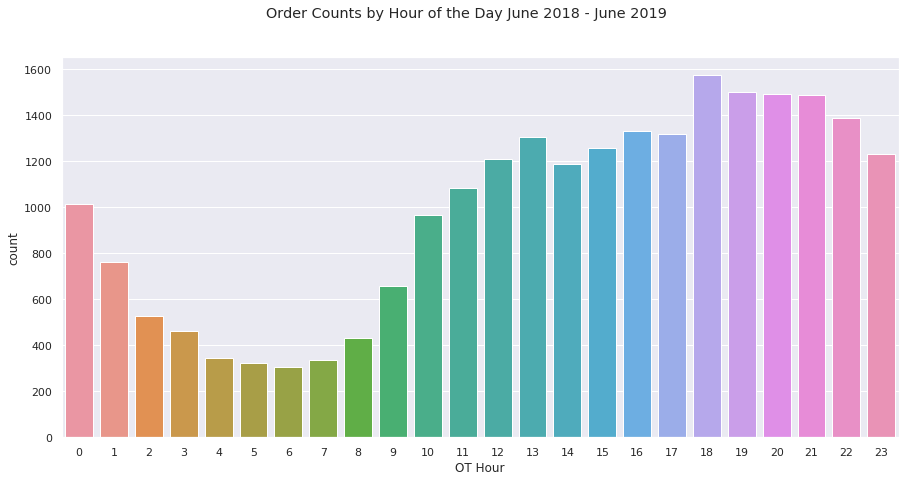

In [46]:
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle("Order Counts by Hour of the Day June 2018 - June 2019")
p = sns.countplot(ax = ax, data=di_clean_2, x ='OT Hour')
#di_data.hist('OT Hour', bins=24)
#plt.title('Order Counts by Hour')
#plt.xlabel('Hour')
#plt.ylabel('Order Count')

[Text(0, 0, 'SK IMG X-RAY ORDERABLES'),
 Text(0, 0, 'SK IMG US ORDERABLES'),
 Text(0, 0, 'SK IMG CT ORDERABLES'),
 Text(0, 0, 'SK IMG MRI ORDERABLES')]

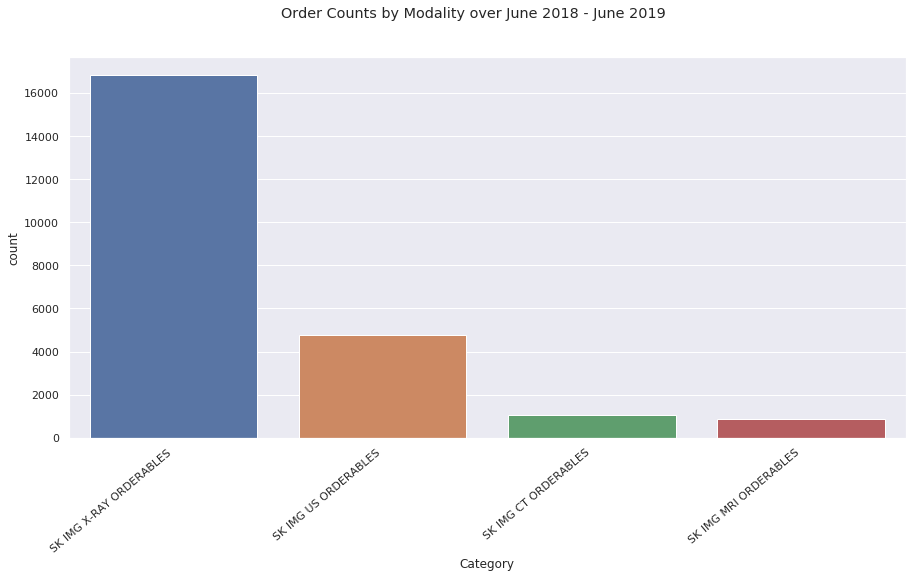

In [47]:
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle("Order Counts by Modality over June 2018 - June 2019")
p = sns.countplot(ax = ax, data=di_clean_2, x = 'Category', order=di_clean_2['Category'].value_counts().index)
p.set_xticklabels(p.get_xticklabels(), rotation = 40, ha = "right")
#p.set_yscale("log")
#di_data.hist('Category id', bins=11)
#plt.title('Order Counts by Category')
#plt.xlabel('Category')
#plt.xlabel('Order Count')
#plt.yscale('log')

In [33]:
#p = sns.countplot(data=di_data, x = di_data.groupby(['OT Month Name', 'Category'])['Category'].count())
#p.set_xticklabels(p.get_xticklabels(), rotation = 40, ha = "right")

di_clean_2.groupby(['Authorizing Provider id', 'Category'])['Category'].count()

Authorizing Provider id  Category               
0                        SK IMG X-RAY ORDERABLES     1
1                        SK IMG X-RAY ORDERABLES     1
2                        SK IMG X-RAY ORDERABLES     1
4                        SK IMG CT ORDERABLES        1
                         SK IMG X-RAY ORDERABLES     2
                                                    ..
243                      SK IMG MRI ORDERABLES       1
244                      SK IMG US ORDERABLES        2
                         SK IMG X-RAY ORDERABLES     4
245                      SK IMG MRI ORDERABLES       1
                         SK IMG X-RAY ORDERABLES    19
Name: Category, Length: 526, dtype: int64

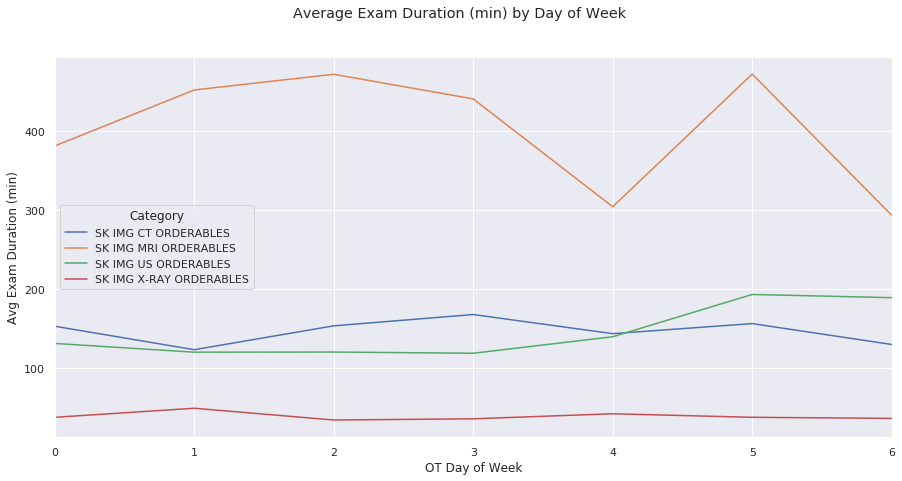

In [48]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Average Exam Duration (min) by Day of Week")
di_clean_2.groupby(['OT Day of Week', 'Category'])['Exam Duration (min)'].mean().unstack().plot(ax=ax)
ax.set_ylabel("Avg Exam Duration (min)")
plt.savefig('image.png')

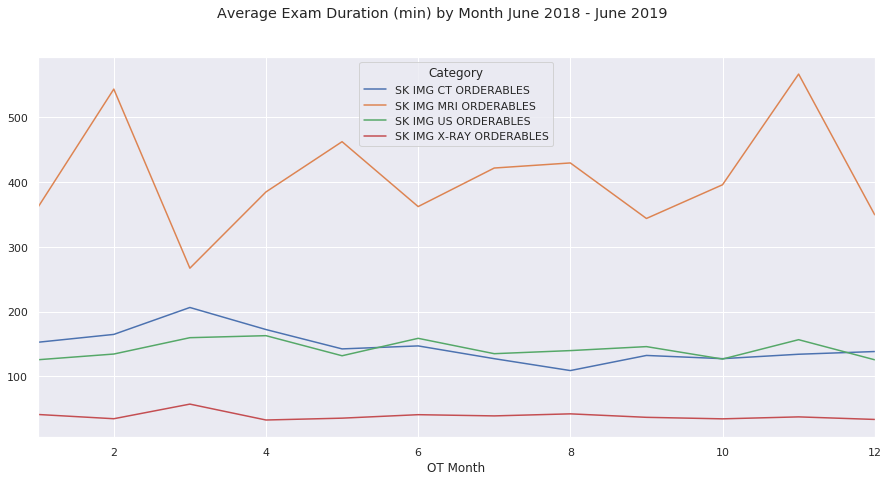

In [49]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Average Exam Duration (min) by Month June 2018 - June 2019")

di_clean_2.groupby(['OT Month', 'Category'])['Exam Duration (min)'].mean().unstack().plot(ax=ax)

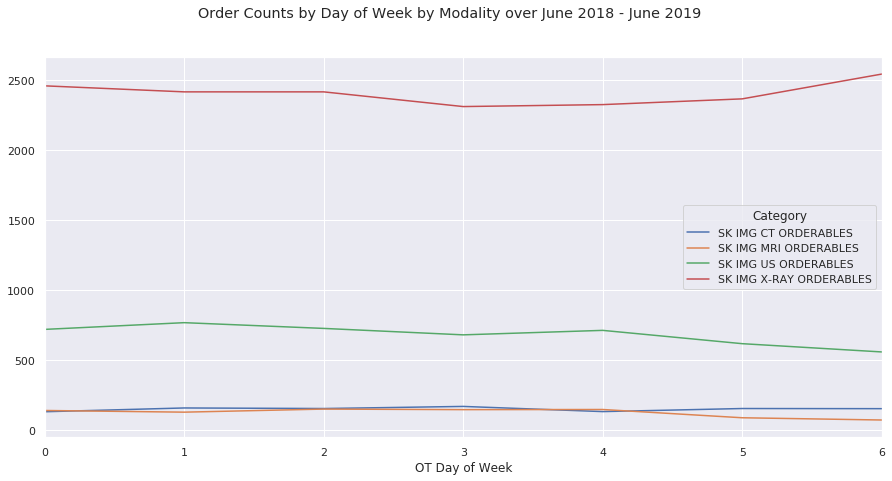

In [50]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Order Counts by Day of Week by Modality over June 2018 - June 2019")
di_clean_2.groupby(['OT Day of Week', 'Category'])['Category'].count().unstack().plot(ax=ax)

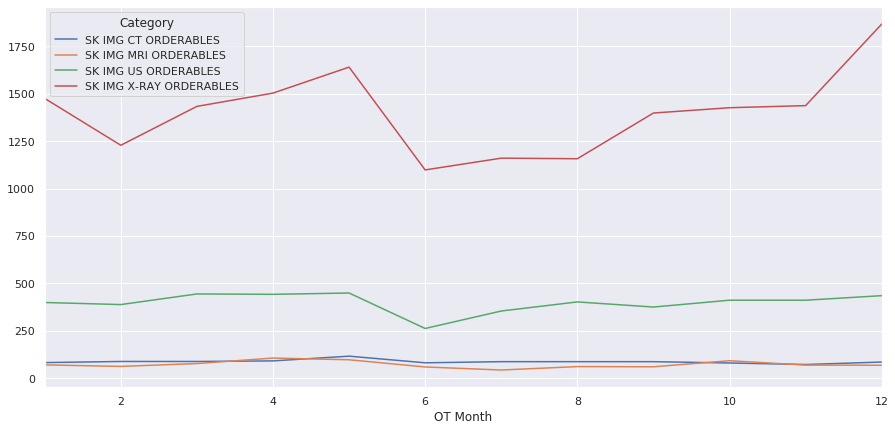

In [51]:
fig, ax = plt.subplots(figsize=(15, 7))

di_clean_2.groupby(['OT Month', 'Category'])['Category'].count().unstack().plot(ax=ax)

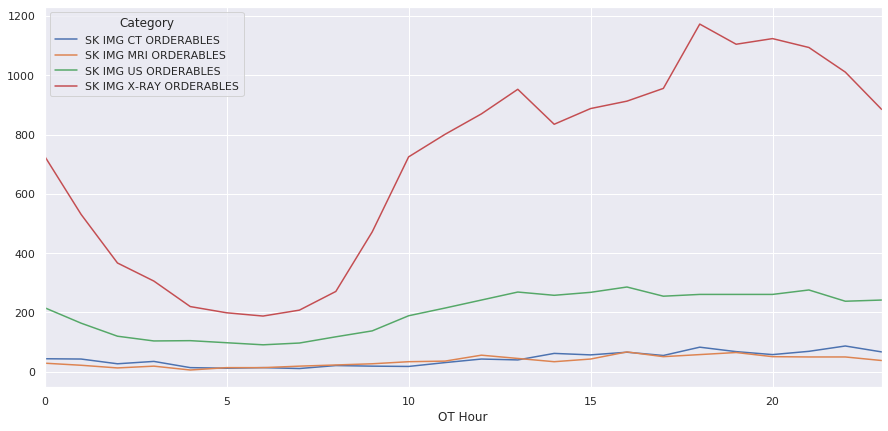

In [52]:
fig, ax = plt.subplots(figsize=(15, 7))

di_clean_2.groupby(['OT Hour', 'Category'])['Category'].count().unstack().plot(ax=ax)